**4 Categorical (Features: 2, 3, 4, 42)
<br>6 Binary (Features: 7, 12, 14, 20, 21, 22)
<br>23 Discrete (Features: 8, 9, 15, 23–41, 43)
<br>10 Continuous (Features: 1, 5, 6, 10, 11, 13, 16, 17, 18, 19)**

**Importing Libraries**


In [1]:
import numpy as np 
import pandas as pd 

https://datascienceparichay.com/article/show-all-columns-of-pandas-dataframe-in-jupyter-notebook/

In [2]:
# settings to display all columns
pd.set_option("display.max_columns", None)


**Importing Dataset**

In [3]:
dataset = pd.read_csv('KDD.txt')

**add the column labels**

In [4]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

dataset.columns = columns

**Number of columns of the dataset**

In [5]:
dataset.shape

(125972, 43)

In [6]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


**Creating lists to categorize attacks into Dos, Probe, Privilege, Access and Normal**

In [7]:
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']




**Defining a function called map_attack to categorize attacks into Dos, Probe, Privilege, Access and Normal**

In [8]:
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 'dos'
        attack_type = 'dos'
    elif attack in probe_attacks:
        # probe_attacks mapt to 'probe'
        attack_type = 'probe'
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 'privilege'
        attack_type = 'privilege'
    elif attack in access_attacks:
        # remote access attacks map to 'access'
        attack_type = 'access'
    else:
        # normal maps to 'normal'
        attack_type = 'normal'
        
    return attack_type

**Adding another column as attack_type to the dataset categorize attacks
into 5 major attack types**

In [9]:
main_attack_type = dataset.attack.apply(map_attack)
dataset['attack_type'] = main_attack_type

**dropping level**

In [10]:
dataset=dataset.drop("attack",axis=1)

In [11]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_type
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


In [12]:
dataset.shape

(125972, 43)

In [13]:
dataset['attack_type'].value_counts()

normal       67351
dos          45927
probe        11656
access         995
privilege       43
Name: attack_type, dtype: int64

**Visualizing Attack Distribution**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Mr.Dmon\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'dos'),
  Text(1, 0, 'access'),
  Text(2, 0, 'probe'),
  Text(3, 0, 'privilege')])

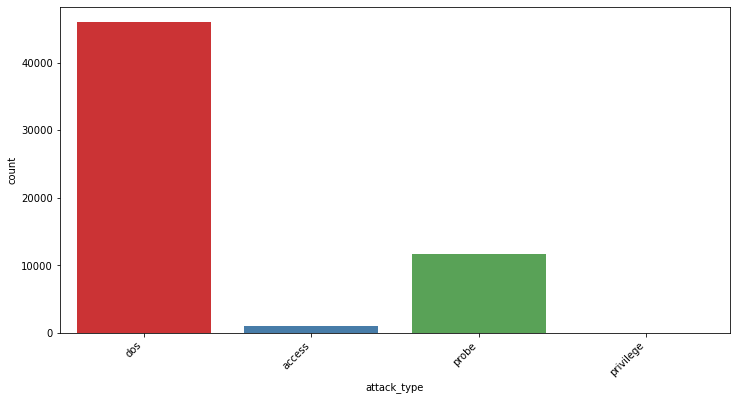

In [15]:
plt_labels = dataset['attack_type'].where(dataset['attack_type'] != "normal")
plt.figure(figsize=(12,6))
chart = sns.countplot(plt_labels, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

**Filtering Labels**

In [16]:
labels = dataset['attack_type']

In [17]:
labels.head()

0    normal
1       dos
2    normal
3    normal
4       dos
Name: attack_type, dtype: object

**Encode categorical features using scikit-learn**

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [19]:
column_trans = make_column_transformer(( OneHotEncoder(), ['protocol_type', 'service', 'flag']), remainder = 'passthrough')

In [20]:
features = column_trans.fit_transform(dataset)

In [21]:
features.shape

(125972, 124)

In [22]:
features[1,123]

'dos'

**Delete columns related to 'attack_type'**

In [23]:
features =  np.delete(features, 123, axis=1)

In [24]:
features.shape

(125972, 123)

**Feature Scaling**

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
Features = sc.fit_transform(features)

In [27]:
Features[0]

array([-2.65430168e-01, -2.10005685e+00,  2.72067166e+00, -3.85572788e-02,
       -2.40796566e-02, -8.30056435e-02, -3.98456975e-03, -8.74011505e-02,
       -7.52869153e-02, -7.65561295e-02, -6.59178045e-02, -6.70023207e-02,
       -6.44438975e-02, -6.54912835e-02, -6.73600142e-02, -2.78096260e-01,
       -5.87972836e-02, -1.94371562e-01, -1.58232847e-01, -6.21686592e-02,
       -6.14569168e-02, -1.19274810e-01, -1.18829024e-01, -2.39966612e-01,
       -6.42573222e-02, -3.98456975e-03, -6.05391461e-02, -6.86331711e-01,
       -2.81750510e-03, -6.50004630e-02, -3.98456975e-03, -7.18510772e-02,
       -7.40506423e-02, -5.87292718e-02, -4.87769458e-02, -5.71429709e-02,
       -6.15219557e-02, -5.84564443e-02, -5.91361853e-02, -5.99418408e-02,
       -5.67923386e-02, -5.25565320e-02, -5.36836675e-02, -5.35347384e-02,
       -7.08960379e-02, -4.85310492e-02, -3.65432708e-02,  5.28197774e+00,
       -6.30023297e-03, -2.48911399e-02, -4.58269026e-02, -2.34102745e-02,
       -4.58131906e-01, -

**Label encoding**

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
Labels = le.fit_transform(labels)

In [30]:
# Categorical labels are replaced with integers.

np.unique(Labels)

array([0, 1, 2, 3, 4])

**Train Test Split**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
features_train, features_test, labels_train, labels_test = train_test_split(Features, Labels, test_size=0.2)

features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((100777, 123), (25195, 123), (100777,), (25195,))

**Building ANN**

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Model

In [34]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(5, activation="softmax")])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(123, activation="softmax")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [35]:
autoencoder = AutoEncoder()

In [36]:
#callback that stops training when minimum value of validation loss function is reached
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode='min')

In [37]:
autoencoder.compile(optimizer='adam', loss='mse')

In [38]:
history = autoencoder.fit(features_train,features_train,
          epochs=50, 
          batch_size=256,
          callbacks=[early_stopping])

Epoch 1/50
394/394 [==============================] - 1s 3ms/step - loss: 0.9830
Epoch 2/50
394/394 [==============================] - 1s 3ms/step - loss: 0.9761
Epoch 3/50
394/394 [==============================] - 1s 3ms/step - loss: 0.9760
Epoch 4/50
394/394 [==============================] - 1s 3ms/step - loss: 0.9760
Epoch 5/50
394/394 [==============================] - 1s 3ms/step - loss: 0.9757
Epoch 6/50
394/394 [==============================] - 1s 3ms/step - loss: 0.9749
Epoch 7/50
394/394 [==============================] - 1s 3ms/step - loss: 0.9745
Epoch 8/50
394/394 [==============================] - 1s 3ms/step - loss: 0.9745
Epoch 9/50
394/394 [==============================] - 1s 3ms/step - loss: 0.9744
Epoch 10/50
394/394 [==============================] - 1s 3ms/step - loss: 0.9742
Epoch 11/50
394/394 [==============================] - 1s 4ms/step - loss: 0.9741A: 0
Epoch 12/50
394/394 [==============================] - 2s 4ms/step - loss: 0.9741
Epoch 13/50
394/394 [

In [39]:
encoded_features_train = autoencoder.encoder(features_train).numpy()
encoded_features_test = autoencoder.encoder(features_test).numpy()

type(encoded_features_train), type(encoded_features_test),encoded_features_train.shape,encoded_features_test.shape

(numpy.ndarray, numpy.ndarray, (100777, 5), (25195, 5))

**Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
classifier =  RandomForestClassifier()

In [42]:
#fit
classifier.fit(encoded_features_train, labels_train)

RandomForestClassifier()

In [43]:
# predict
labels_test_predictions = classifier.predict(encoded_features_test)

In [44]:
type(labels_test_predictions)

numpy.ndarray

In [45]:
labels_test_predictions.shape

(25195,)

In [46]:
labels_test_predictions[:],labels_test[:]

(array([2, 2, 2, ..., 2, 2, 4]), array([2, 2, 2, ..., 2, 2, 4]))

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

def print_status(labels, predictions):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions, average='macro', zero_division=0)))
  print("Recall = {}".format(recall_score(labels, predictions, average='macro')))


In [48]:
print_status((labels_test).astype(int),(labels_test_predictions).astype(int))

Accuracy = 0.9784084143679301
Precision = 0.7486307389552902
Recall = 0.6063872594532211


**Classification Report**

In [49]:
from sklearn.metrics import classification_report

In [50]:
classes = ['access', 'dos', 'normal', 'privilege', 'probe']

In [51]:
print(classification_report(labels_test, labels_test_predictions, target_names=classes, zero_division=0))

              precision    recall  f1-score   support

      access       0.81      0.10      0.18       203
         dos       0.99      0.98      0.99      9213
      normal       0.97      0.99      0.98     13455
   privilege       0.00      0.00      0.00         9
       probe       0.97      0.95      0.96      2315

    accuracy                           0.98     25195
   macro avg       0.75      0.61      0.62     25195
weighted avg       0.98      0.98      0.98     25195

